## Analysis and Visualization of 
# Income Disparities around the world

from 1978 - 2007

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import plotly.plotly as py
import plotly.tools as tls

Reading Datafiles from www.gapminder.com

In [2]:

high10 = pd.read_excel('Indicator_Income share held by highest 10%.xlsx', index_col=0)
high20 = pd.read_excel('Indicator_Income share held by highest 20%.xlsx', index_col=0)
sec20 = pd.read_excel('Indicator_Income share held by second 20%.xlsx', index_col=0)
thi20 = pd.read_excel('Indicator_Income share held by third 20%.xlsx', index_col=0)
four20 = pd.read_excel('Indicator_Income share held by fourth 20%.xlsx', index_col=0)
low20 = pd.read_excel('indicator SI_DST_FRST_20.xls.xlsx', index_col=0)
low10 = pd.read_excel('Indicator_Income share held by lowest 10%.xlsx', index_col=0)


num_bill = pd.read_excel('Indicator_number of billionaires.xlsx', index_col=0)
rel_num_bill = pd.read_excel('Indicator_Number of billionaires per 1 million inhabitants.xlsx', index_col=0)
avg_age_bill = pd.read_excel('Indicator_Average age.xlsx', index_col=0)

gini = pd.read_excel('indicator SI_POV_GINI.xls.xlsx', index_col=0)

* mean per country - quartiles    the most unequal, poorest, richest countries of the world 

* histograms

* might have to bin countries together to continents


In [3]:
GD = gini.transpose().dropna(1, how='all')

In [4]:
GD_list = list(GD.transpose().index)

In [10]:
#plt.figure(figsize=(20,10))
#plt.plot(GD.transpose())
#plt.legend(GD_list)
#plt.ylim(0, 100)
#plt.show()

* group countries by continent
* make movable plot through years

In [6]:
GDt = GD.transpose().reset_index()

In [7]:
#sns.pairplot(GDt)

In [9]:
#gini_years = GDt.columns[3:]



#for year in gini_years:
#    a = GDt[[year, 'GINI index']].dropna()
#    c = len(a) / 4
#    plt.subplots(figsize=(5,c))
#    sns.barplot(x=year, y='GINI index', data=a)
#    
#plt.tight_layout()''

In [11]:
#plt.figure(figsize=(15,5))
#sns.violinplot(data=GDt, inner=None)
#sns.swarmplot(data=GDt, color='k', alpha=0.7)
#plt.ylim(0,100)
#plt.ylabel('Gini coefficient')
#plt.xlabel('Year')
#plt.show()

In [12]:
gini_countries = list(GDt['GINI index'])

In [45]:
GDr = GD.reset_index()
l = pd.Series([float(i) for i in GDr['index'].values])

GDt = GDr.replace(GDr['index'], l).set_index('index')

pandas.core.indexes.base.Index

In [14]:
year_value = []
ann_text = []
for i in range(157):
    values = GDt.loc[i].dropna()
    years = GDt.loc[i].dropna().index
    for value in values[1:]:
        for year in years[1:]:
            year_value.append([year, value])
            ann_text.append(values[0])

In [22]:
ys_vs = []
a = []

vs = GDt.loc[1].dropna()
ys = GDt.loc[1].dropna().index
for v in vs[1:]:
    for y in ys[1:]:
        ys_vs.append([y, v])
        a.append(vs[0])
        
a

['Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania']

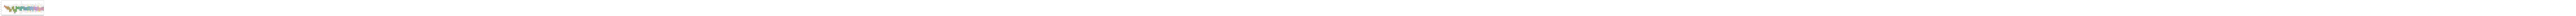

In [27]:
plt.figure(figsize=(15,5))
sns.boxplot(data=GDt)
swarm = sns.swarmplot(data=GDt, palette='Set2')
#for x_y in ys_vs:
#    for text in a:
swarm.annotate(s='Albania', xy=[float('1997'), 29.12])
#plt.legend(GDt['GINI index'])   # make animated so that you can hover over point to tell which country
plt.show()

In [ ]:
std = np.std(GDt)
labels = std.index[::2]
year_GD = GDt.set_index('GINI index').transpose().reset_index()

plt.figure(figsize=(9,7))
plt.scatter(std, year_GD['index'], cmap='terrain', c=range(33))
plt.xlim(0,18)
plt.title('standart deviation per year')

In [ ]:
GD = GDt.set_index('GINI index')

In [ ]:
#GDt.hist()
sns.violinplot(GD)